# Python机器学习基础教程（笔记）
## 第一章：引言
### 1.1 鸢尾花应用
#### 1.1.1 初识数据
下面的例子使用了鸢尾花（Iris）数据集，它包含在 `scikit-learn` 的 `datasets` 模块中，调用 `load_iris` 函数可以加载数据。

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

load_iris 返回的 iris 是一个 Bunch 对象，与字典非常类似，包含键值。

In [4]:
print("keys of iris_dataset: \n{}".format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


1. `print()` 是一个内置函数，用于在控制台或终端上打印信息。
2. `"keys of iris_dataset: \n{}"` 是一个格式化的字符串，其中包含两个部分：
    - `"keys of iris_dataset: "` 是静态文本，将会直接打印出来。
    - `\n` 是一个换行符，用于开始新的一行。
    - `{}` 是一个占位符，它将被后面提供的值所替换。
3. `.format(iris_dataset.keys())` 是格式化字符串的一部分，它告诉Python用 `iris_dataset.keys()` 的结果替换前面的{}。`iris_dataset.keys()` 方法返回对象中所有的键。

In [6]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


DESCR 键对应的值是数据集的简要说明，这段代码是打印出 `iris_dataset` 中对应的 `'DESCR'` 键对应的值的描述信息的前193个字符，然后添加省略号（"..."）表示还有更多的内容未显示。
1. `iris_dataset['DESCR']`：这将访问 `iris_dataset` 字典中与键 `'DESCR'` 相关的值。通常，在从 sklearn 库加载的数据集中，`'DESCR'` 键包含了一段描述数据集的详细文本。
2. `[:193]`：这是 Python 中的切片操作，意味着从 `iris_dataset['DESCR']` 获取的字符串将只保留从第一个字符到第193个字符（不包括第193位之后的字符）。这是因为字符串索引是从0开始的，所以 `[:193]` 实际上是获取从第0个位置到第192个位置的字符。
3. `+ "\n..."`：这是将从步骤2得到的字符串与一个新的字符串 `"\n..."` 进行拼接。`"\n"` 是一个换行符，会在输出中插入一个新行，而 `"..."` 则表示还有更多内容没有显示出来。

In [8]:
print("Target names:{}".format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


target_names 键对应的值是一个字符串列表，里面包含我们要预测的花的品种。

In [10]:
print("Feature names:\n{}".format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


feature_names 键对应的值是一个字符串列表，对每一个特征进行了说明。

In [12]:
print("Shape of data:\n{}".format(iris_dataset['data'][:5]))

Shape of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
print("Shape of target:{}".format(iris_dataset['data'].shape))

Shape of target:(150, 4)


这段代码用于打印出 `iris_dataset` 中数据部分（即'data'键对应的值）的形状（shape），也就是数组的维度信息。
- `.shape`：这是NumPy数组的一个属性，返回一个元组，表示数组的维度大小。例如，对于二维数组，`.shape` 会返回(行数, 列数)这样的元组。

数组中包含 150 朵不同的花的测量数据。data 数组的形状（shape）是样本数乘以特征数。这是 scikit-learn 中的约定，你的数据形状应始终遵循这个约定。

In [15]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


上述数字的代表含义由 `iris['target_names']` 数组给出：`0`代表 `setosa`，`1`代表 `versicolor`，`2` 代表` virginic`。
#### 1.1.2 训练数据与测试数据。
scikit-learn 中的 train_test_split 函数可以打乱数据集并进行拆分。这个函数将 75% 的
行数据及对应标签作为训练集，剩下 25% 的数据及其标签作为测试集scikit-learn 中的数据通常用大写的 X 表示，而标签用小写的 y 表示。对数据调用 train_test_split，并对输出结果采用下面这种命名方法：

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

`model_selection` 模块提供了用于数据分割、交叉验证等模型选择功能的工具。`train_test_split` 函数对传入数组会进行分割，`random_state` 参数指定了随机
数生成器的种子用于把数据打乱。

In [19]:
print("X_train shape:{}".format(X_train.shape))

X_train shape:(112, 4)


这里可以简单看一下 `X_train` 的数量是112，对应的 `y_train` 的数量是38。
#### 1.1.3 观察数据
下面的代码会绘制一个散点图矩阵，从而可以两两查看所有的特征。

In [21]:
import pandas as pd
import mglearn
iris_dataframe = pd.DataFrame(X_train,columns = iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe,c=y_train,figsize=(15,15),marker='0',hist_kwds = {'bins':20 },s=20,alpha=.8,cmap=mglearn.cm3)

ModuleNotFoundError: No module named 'mglearn'

`iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)`：这行代码将训练集的特征数据 X_train 转化为一个 pandas DataFrame。DataFrame 是一种二维表格型数据结构,你可以简单理解为一个 Excel 表格。`iris_dataset.feature_names` 被用作 DataFrame 的列名。列名的含义就是这个表格每个字段的表头，例如下面这种形式：
||sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm)|
|---|---|---|---|---|
0 |            5.1 |          3.5   |          1.4  |       0.2|
1 |            4.9 |          3.0   |          1.4  |       0.2|
2 |            4.7 |          3.2   |          1.3  |       0.2|
3 |            4.6 |          3.1   |          1.5  |       0.2|
4 |            5.0 |          3.6   |          1.4  |       0.2|

接下来的代码使用`pandas`的`scatter_matrix`函数创建了一个散点图矩阵，它将 DataFrame 中的每一对特征都绘制为一个散点图。
> 注意：原文使用的 `pd.scatter_matrix` 方式已经被弃用，现在使用 `pd.plotting.scatter_matrix` 方式调用。

`scatter_matrix`中的参数含义如下：

- `c=y_train`：指定使用训练集的目标值 y_train 作为颜色编码，这样可以在散点图中区分不同的类别。
- `figsize=(15,15)`：设置图形的大小为15x15英寸，以便更好地查看细节
- `marker='o'`：设置散点图中点的样式为圆形。
- `hist_kwds={'bins':20}`：当绘制散点图矩阵时，对角线上的子图通常是单变量的直方图，这里设置了直方图的 bin 数目为0。
- `s=20`：设置散点图中点大小。
- `alpha=.8`：设置透明度，让重叠的点更易识别。
- `cmap=mglearn.cm3`：设置颜色映射，mglearn.cm3 是从 mglearn 库中引用的一种颜色映射方案，用于区分不同类别的点。

最终，这段代码会生成一个大型的散点图矩阵，每个小图展示 iris_dataframe 中的一对特征之间的关系，同时使用颜色编码来区分不同的类别，帮助分析特征之间的相关性和模式。

> 注意：对于对角线的直方图来说，横轴是特征的范围，纵轴是取值范围内数据点的数量。

#### 1.1.4 构建第一个模型

`scikit-learn` 中有许多可用的分类算法，这里用 K 近邻算法。K 近邻算法的含义是训练集中与新数据点最近的任意 k 个邻居。在本例中，我们采取一个邻居的方式。另外在 `scikit-learn` 中有很多现成算法，K 近邻算法在 KNeighborsClassifier 类中实现的。

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

先实例化这个类，并且设置邻居数量为1。

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

调用 `knn` 的 `fix` 方法，输入参数，`X_train` 为训练数据，`y_train` 为训练对应的标签。

#### 1.1.5 做出预测

假设我们发现一朵鸢尾花，花萼长 5cm 宽 2.9cm，花瓣长 1cm 宽 0.2cm。那么这朵花属于哪个品种呢？先把这朵花的数据放在一个 Numpy 数组中。

In [31]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


调用 knn 对象的 predict 方法来进行预测。

In [34]:
prediction = knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction:[0]
Predicted target name: ['setosa']


预测这朵花的类型是 0，属于 setosa 品种。

#### 1.1.6 评估模型

上述预测我们得知了花的品种，但是我们不知道这个结果是否可信，所以需要对这个模型进行测试，进行精度的评估。

In [37]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [39]:
print("Test sert score:{:.2}".format(np.mean(y_pred == y_test)))

Test sert score:0.97


## 第二章：监督学习
### 2.1 监督学习算法
#### 2.1.1 一些样本数据集

X.shape:(26, 2)


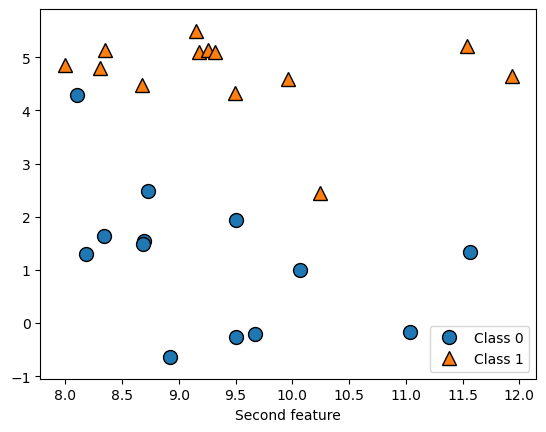

In [102]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
import matplotlib.pyplot as plt
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.xlabel("Second feature")
print("X.shape:{}".format(X.shape))

Text(0, 0.5, 'Target')

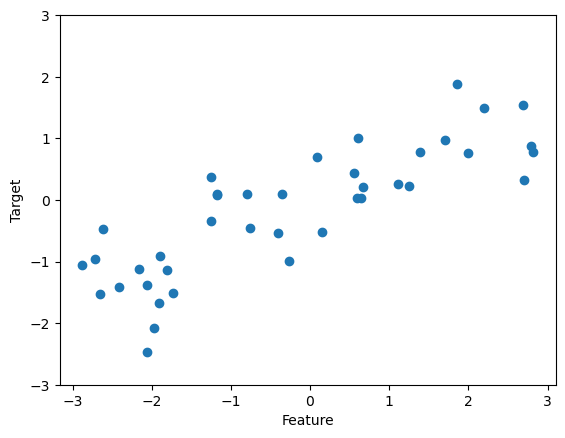

In [104]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [106]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [35]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [37]:
print("Sample counts per class:\n{}".format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [39]:
print("Feature name:\n{}".format(cancer.feature_names))

Feature name:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [54]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=2, as_frame=True)
print("Data shape:{}".format(boston.data.shape))

Data shape:(506, 13)


In [56]:
X,y =mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


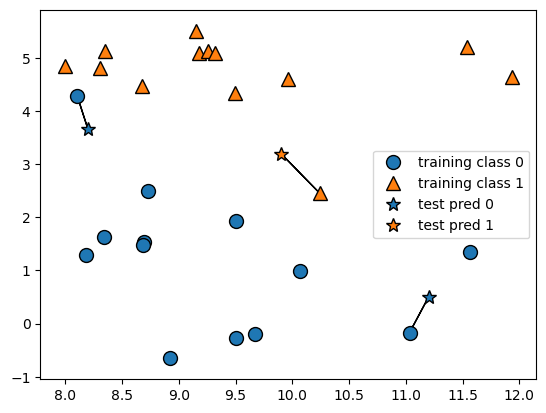

In [58]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

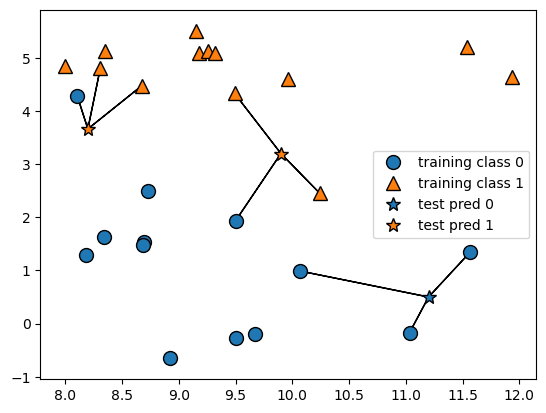

In [110]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [112]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [118]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
print("Test set prediction:{}".format(clf.predict(X_test)))

Test set prediction:[1 0 1 0 1 0 0]


In [122]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy: 0.86
